In [400]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
import datetime as datetime
from dateutil.relativedelta import relativedelta

In [401]:
ser = pd.read_csv('byggd_serbyli.csv', sep=';', index_col=0)
fjol = pd.read_csv('byggd_fjolbyli.csv', sep=';', index_col=0)
stada = pd.read_csv('stada_rvk.csv', index_col=0)
byggt = pd.read_csv('byggdar_ibudir.csv', sep=';',header=None)
mann = pd.read_csv('mannfjoldi_sveita.csv', index_col=0).T

In [402]:
bnb = pd.read_csv('airbnb_data.csv',index_col=0)
bnb['postnumer'] = bnb['postnumer'].astype(int)

In [403]:
mann = mann[['Reykjavík', 'Kópavogur', 'Garðabær', 'Hafnarfjörður',
       'Mosfellsbær']]
mann.index.names = ['date']       
mann.head()

,Reykjavík,Kópavogur,Garðabær,Hafnarfjörður,Mosfellsbær
date,,,,,
2006,114968,26512,9444,22498,7165
2007,116642,27525,9556,23751,7516
2008,118827,28885,9982,25036,8192
2009,119547,29976,10358,25850,8403
2010,118326,30357,10643,25913,8553


In [404]:
ibudir = ser[1:] + fjol[1:]
ibudir.columns = mann.columns
ibudir.index.names = ['date']
ibudir.head()

,Reykjavík,Kópavogur,Garðabær,Hafnarfjörður,Mosfellsbær
date,,,,,
2006,49038,11205,4403,8674,2517
2007,49966,11546,4702,9610,2728
2008,50559,11877,4913,9867,3051
2009,50690,11905,4916,9873,3067
2010,50733,12066,4926,9900,3101


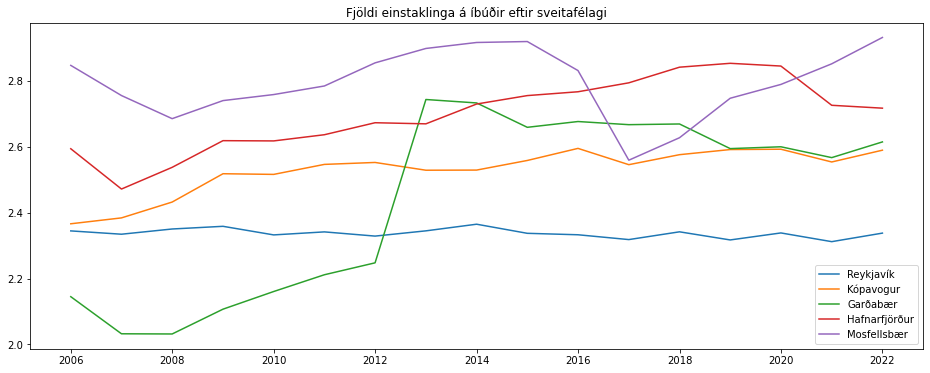

In [405]:
test = mann.values / ibudir.values
test = pd.DataFrame(test, columns=mann.columns, index=mann.index)
test.index = pd.to_datetime(test.index)
plt.figure(figsize=(16,6))
plt.plot(test)
plt.title('Fjöldi einstaklinga á íbúðir eftir sveitafélagi')
plt.legend(test.columns)
plt.show()

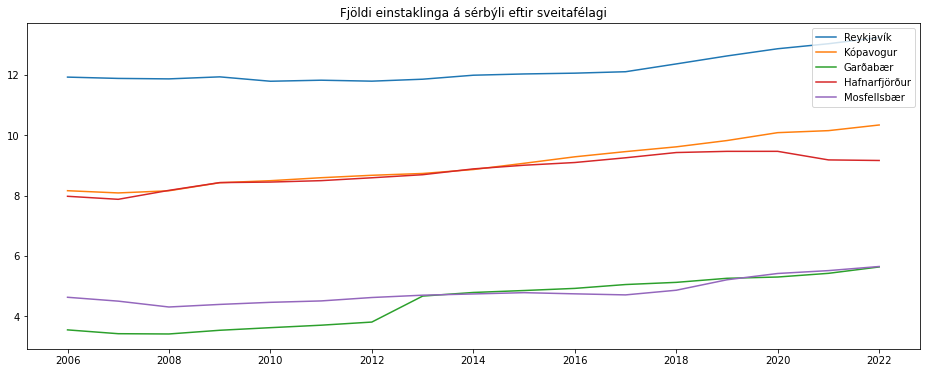

In [406]:
test = mann.values / ser[1:].values
test = pd.DataFrame(test, columns=mann.columns, index=mann.index)
test.index = pd.to_datetime(test.index)
plt.figure(figsize=(16,6))
plt.plot(test)
plt.title('Fjöldi einstaklinga á sérbýli eftir sveitafélagi')
plt.legend(test.columns)
plt.show()

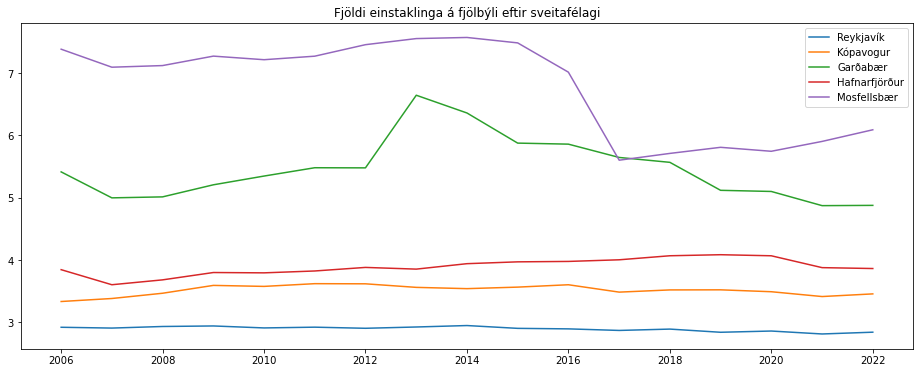

In [407]:
test = mann.values / fjol[1:].values
test = pd.DataFrame(test, columns=mann.columns, index=mann.index)
test.index = pd.to_datetime(test.index)
plt.figure(figsize=(16,6))
plt.plot(test)
plt.title('Fjöldi einstaklinga á fjölbýli eftir sveitafélagi')
plt.legend(test.columns)
plt.show()

In [408]:
df = pd.merge(ser[-1:], fjol[-1:], how='outer')
df.columns = mann.columns
df = pd.merge(df, mann[-1:], how='outer')
df = df.T
df.rename(columns={2:'Íbúar', 1: 'Fjölbýli', 0: 'Sérbýli'}, inplace=True)
df


,Sérbýli,Fjölbýli,Íbúar
Reykjavík,10253,47789,135688
Kópavogur,3773,11288,38998
Garðabær,3273,3782,18445
Hafnarfjörður,3249,7706,29763
Mosfellsbær,2305,2138,13024


<AxesSubplot:>

<Figure size 1152x720 with 0 Axes>

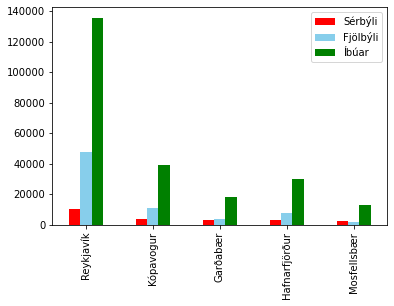

In [409]:
plt.figure(figsize=(16,10))
df.plot(kind='bar', color=['red', 'skyblue', 'green'])

In [410]:
bnb

,Period,NoOfProperties,postnumer
0,201501,1,101
1,201501,38,101
2,201501,1,104
3,201501,9,105
5,201501,1,200
...,...,...,...
52597,202101,1,108
52599,202101,27,101
52600,202101,10,105
52601,202101,4,108


In [411]:
def set_postnumer(row):
    if row["postnumer"] == 101:
        return "Reykjavik"
    elif row["postnumer"] == 102:
        return "Reykjavik"
    elif row["postnumer"] == 103:
        return "Reykjavik"
    elif row["postnumer"] == 104:
        return "Reykjavik"
    elif row["postnumer"] == 105:
        return "Reykjavik"
    elif row["postnumer"] == 107:
        return "Reykjavik"
    elif row["postnumer"] == 200:
        return "Kopavogur"
    elif row["postnumer"] == 201:
        return "Kopavogur"
    elif row["postnumer"] == 203:
        return "Kopavogur"
    elif row["postnumer"] == 210:
        return "Gardabaer"
    elif row["postnumer"] == 221:
        return "Gardabaer"
    elif row["postnumer"] == 225:
        return "Gardabaer"
    elif row["postnumer"] == 220:
        return "Hafnarfjordur"
    elif row["postnumer"] == 270:
        return "Mosfellsbaer"
    elif row["postnumer"] == 271:
        return "Mosfellsbaer"
    elif row["postnumer"] == 276:
        return "Mosfellsbaer"  
    else:
        return "drop"

abnb = bnb.assign(sveitafelag=bnb.apply(set_postnumer, axis=1))

In [412]:
abnb = abnb[abnb['sveitafelag'] != 'drop']
abnb

,Period,NoOfProperties,postnumer,sveitafelag
0,201501,1,101,Reykjavik
1,201501,38,101,Reykjavik
2,201501,1,104,Reykjavik
3,201501,9,105,Reykjavik
5,201501,1,200,Kopavogur
...,...,...,...,...
52580,202101,1,107,Reykjavik
52587,202101,1,101,Reykjavik
52599,202101,27,101,Reykjavik
52600,202101,10,105,Reykjavik


<AxesSubplot:xlabel='sveitafelag', ylabel='NoOfProperties'>

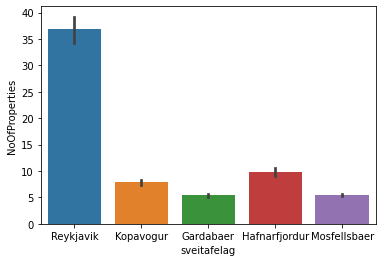

In [413]:
sns.barplot(x='sveitafelag', y='NoOfProperties', data=abnb)

In [414]:
abnb.dtypes

Period             int64
NoOfProperties     int64
postnumer          int32
sveitafelag       object
dtype: object

In [415]:
#abnb['Period'] = abnb['Period'].astype(str)
#abnb['Period'] = abnb['Period'].str[:-2]


In [416]:
abnb

,Period,NoOfProperties,postnumer,sveitafelag
0,201501,1,101,Reykjavik
1,201501,38,101,Reykjavik
2,201501,1,104,Reykjavik
3,201501,9,105,Reykjavik
5,201501,1,200,Kopavogur
...,...,...,...,...
52580,202101,1,107,Reykjavik
52587,202101,1,101,Reykjavik
52599,202101,27,101,Reykjavik
52600,202101,10,105,Reykjavik


In [417]:
listings = abnb[['Period', 'sveitafelag', 'NoOfProperties']]
listings = listings.groupby(['Period', 'sveitafelag'])['NoOfProperties'].sum()


In [418]:
listings = pd.DataFrame(listings)

In [419]:
listings[150:]

NoOfProperties
Period sveitafelag                  
201707 Gardabaer                 168
       Hafnarfjordur             180
       Kopavogur                 322
       Mosfellsbaer              145
       Reykjavik                3017
...                              ...
202101 Gardabaer                  84
       Hafnarfjordur              52
       Kopavogur                 144
       Mosfellsbaer              102
       Reykjavik                1202

[215 rows x 1 columns]

In [420]:
listings.reset_index(inplace=True)
listings

,Period,sveitafelag,NoOfProperties
0,201501,Gardabaer,30
1,201501,Hafnarfjordur,42
2,201501,Kopavogur,51
3,201501,Mosfellsbaer,27
4,201501,Reykjavik,754
...,...,...,...
360,202101,Gardabaer,84
361,202101,Hafnarfjordur,52
362,202101,Kopavogur,144
363,202101,Mosfellsbaer,102


<AxesSubplot:xlabel='Period', ylabel='NoOfProperties'>

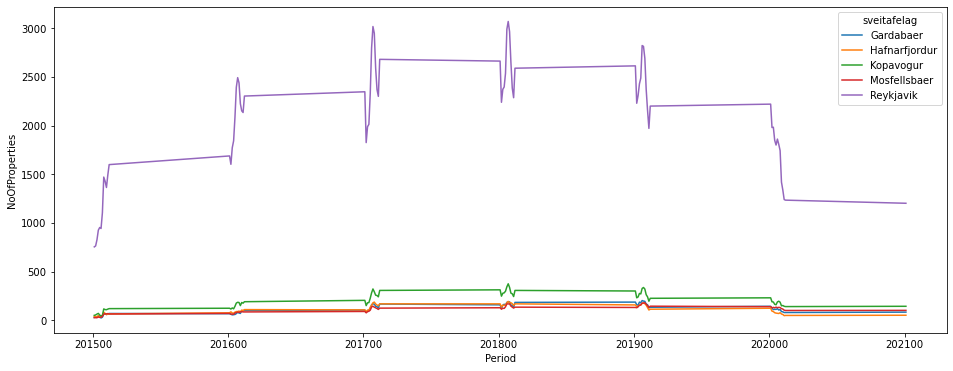

In [421]:
plt.figure(figsize=(16,6))
sns.lineplot(x='Period', y='NoOfProperties', hue='sveitafelag',data=listings)

<AxesSubplot:xlabel='sveitafelag', ylabel='NoOfProperties'>

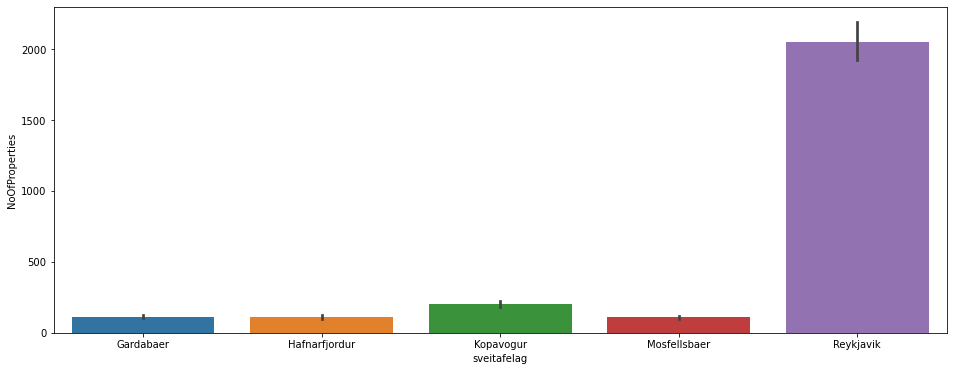

In [422]:
plt.figure(figsize=(16,6))
sns.barplot(x='sveitafelag', y='NoOfProperties',data=listings)